In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [198]:
oscar = pd.read_csv('C:/Users/gisiq/Documents/Cursos/Ironhack/projeto_final/oscar_model_final.csv')

In [80]:
oscar

,Unnamed: 0,imdb_title_id,title,title_pt,year,avg_vote,votes,metascore,runtime,genre,...,worlwide_gross_income,description,win,Won Golden Globe,Won Bafta,Oscar Nominations,Golden Globe Nominations,Bafta Nominations,Won Directors,Won Actors
0,0,tt6294822,The Post,The Post: A Guerra Secreta,2017,7.2,130017.0,8.3,116.0,Drama,...,192938646.0,A cover-up spanning four U.S. Presidents pushe...,0,0.0,0.0,2.0,6.0,0.0,0.0,0.0
1,1,tt5776858,Il filo nascosto,Trama Fantasma,2017,7.5,106231.0,9.0,130.0,"Drama, Romance",...,47756590.0,"Set in 1950s London, Reynolds Woodcock is a re...",0,0.0,0.0,6.0,2.0,4.0,0.0,0.0
2,2,tt5027774,"Tre manifesti a Ebbing, Missouri",Três Anúncios para um Crime,2017,8.2,411693.0,8.8,115.0,"Comedy, Crime, Drama",...,160192031.0,A mother personally challenges the local autho...,0,1.0,1.0,9.0,6.0,9.0,0.0,1.0
3,3,tt4925292,Lady Bird,Lady Bird: A Hora de Voar,2017,7.4,228832.0,9.4,94.0,"Comedy, Drama",...,79097104.0,"In 2002, an artistically inclined seventeen-ye...",0,1.0,0.0,5.0,4.0,1.0,0.0,0.0
4,4,tt4555426,L'ora più buia,O Destino de uma Nação,2017,7.4,165715.0,7.5,125.0,"Biography, Drama, History",...,153129891.0,"In May 1940, the fate of World War II hangs on",0,0.0,0.0,6.0,1.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,550,tt10272386,The Father,Meu Pai,2020,8.2,148.0,8.7,97.0,Drama,...,5100000.0,A man refuses all assistance from his daughter...,0,0.0,0.0,6.0,4.0,6.0,0.0,0.0
551,551,tt9784798,Judas and the Black Messiah,Judas e o Messias Negro,2020,7.6,37135.0,8.5,126.0,"Biography, Drama, History",...,6057415.0,Bill O'Neal infiltrates the Black Panther Part...,0,0.0,0.0,5.0,1.0,4.0,0.0,0.0
552,552,tt9770150,Nomadland,Nomadland,2020,7.5,56344.0,9.3,107.0,"Biography, Drama, History",...,5074445.0,"A woman in her sixties who, after losing every...",0,1.0,1.0,6.0,4.0,7.0,0.0,0.0
553,553,tt1070874,The Trial of the Chicago 7,Os 7 de Chicago,2020,7.8,131684.0,7.6,129.0,"Drama, History, Thriller",...,115000.0,The story of 7 people on trial stemming from v...,0,0.0,0.0,5.0,4.0,3.0,0.0,0.0


In [81]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                555 non-null    int64  
 1   imdb_title_id             555 non-null    object 
 2   title                     555 non-null    object 
 3   title_pt                  555 non-null    object 
 4   year                      555 non-null    int64  
 5   avg_vote                  555 non-null    float64
 6   votes                     555 non-null    float64
 7   metascore                 555 non-null    float64
 8   runtime                   555 non-null    float64
 9   genre                     555 non-null    object 
 10  director                  555 non-null    object 
 11  actors                    555 non-null    object 
 12  writer                    555 non-null    object 
 13  budget                    555 non-null    float64
 14  usa_gross_

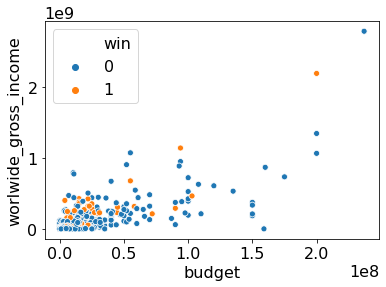

In [46]:
sns.scatterplot(x='budget',y='worlwide_gross_income', hue='win', data=oscar, palette='tab10')

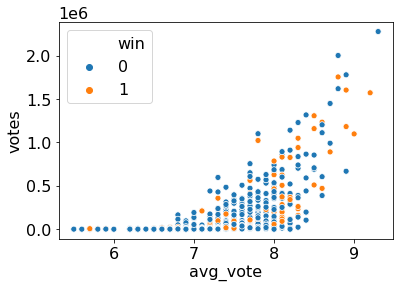

In [47]:
sns.scatterplot(x='avg_vote',y='votes', hue='win', data=oscar, palette='tab10')

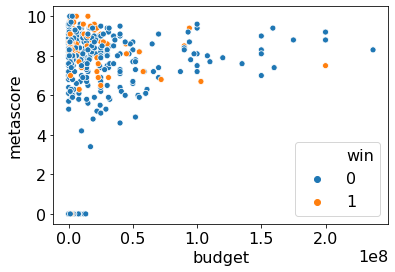

In [48]:
sns.scatterplot(x='budget',y='metascore', hue='win', data=oscar, palette='tab10')

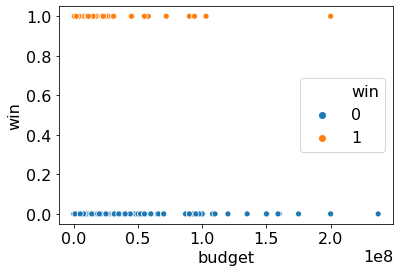

In [49]:
sns.scatterplot(x='budget',y='win', hue='win', data=oscar, palette='tab10')

In [50]:
oscar.keys()

Index(['Unnamed: 0', 'imdb_title_id', 'title', 'title_pt', 'year', 'avg_vote',
       'votes', 'metascore', 'runtime', 'genre', 'director', 'actors',
       'writer', 'budget', 'usa_gross_income', 'worlwide_gross_income',
       'description', 'win', 'Won Golden Globe', 'Won Bafta',
       'Oscar Nominations', 'Golden Globe Nominations', 'Bafta Nominations',
       'Won Directors', 'Won Actors'],
      dtype='object')

In [199]:
var = oscar.drop(['imdb_title_id', 'title', 'title_pt', 'genre', 'director', 'actors', 'writer','description', 'Unnamed: 0', 'win','budget', 'usa_gross_income', 'worlwide_gross_income'], axis=1)  
var_list = list(var.columns)
var_list

['year',
 'avg_vote',
 'votes',
 'metascore',
 'runtime',
 'Won Golden Globe',
 'Won Bafta',
 'Oscar Nominations',
 'Golden Globe Nominations',
 'Bafta Nominations',
 'Won Directors',
 'Won Actors']

In [200]:
y = oscar.win
X = var

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [202]:
X_train.to_csv('data/training_var.csv', index = False)
X_test.to_csv('data/testing_var.csv', index = False)
y_train.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

In [203]:
print('Training Variables Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Variables Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Variables Shape: (444, 12)
Training Labels Shape: (444,)
Testing Variables Shape: (111, 12)
Testing Labels Shape: (111,)


# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
classifier_lr = LogisticRegression(random_state=0,solver="lbfgs")
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [147]:
y_pred_lr = classifier_lr.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [149]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[95  0]
 [15  1]]


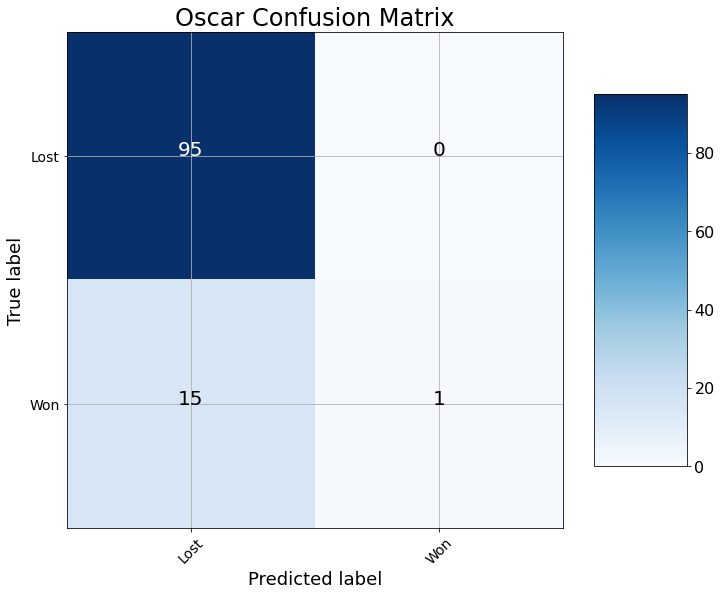

In [150]:
cm_lg = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lg, classes = ['Lost', 'Won'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

95 correct predictions and 16 incorrect predictions.

In [151]:
from sklearn import metrics

In [152]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy 0.8648648648648649


In [153]:
train_probs_lr = classifier_lr.predict_proba(X_train)[:, 1]
probs_lr = classifier_lr.predict_proba(X_test)[:, 1]

train_predictions_lr = classifier_lr.predict(X_train)
predictions_lr = classifier_lr.predict(X_test)

In [154]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [155]:
roc_auc_score(y_train, train_probs_lr)
roc_auc_score(y_test, probs_lr)

0.6710526315789475

In [156]:
roc_auc_score(y_test, [1 for _ in range(len(y_test))])

0.5

In [157]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'g', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.06 Train: 0.08
Precision Baseline: 0.14 Test: 1.0 Train: 0.43
Roc Baseline: 0.5 Test: 0.67 Train: 0.68


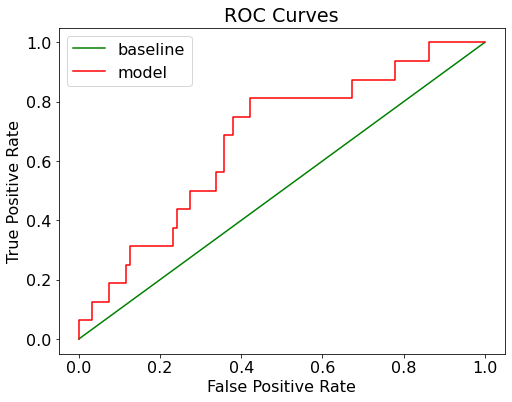

In [129]:
evaluate_model(predictions_lr, probs_lr, train_predictions_lr, train_probs_lr)

In [101]:
train_lr = oscar[(oscar.year>=1990)&(oscar.year<=2017)]

In [102]:
test_lr = oscar[(oscar.year==2018)]

In [103]:
target_lr = train_lr['win'].values

In [104]:
var_lr = train_lr[var_list].values
var_lr

array([[2.01700e+03, 7.20000e+00, 1.30017e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 7.50000e+00, 1.06231e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 8.20000e+00, 4.11693e+05, ..., 9.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.99000e+03, 8.00000e+00, 2.35155e+05, ..., 9.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.99000e+03, 8.70000e+00, 9.91505e+05, ..., 7.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99000e+03, 7.00000e+00, 1.92449e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [105]:
classifier_lr.fit(var_lr, target_lr)

LogisticRegression(random_state=0)

In [106]:
test_var_lr = test_lr[var_list].values
pred_LR = classifier_lr.predict_proba(test_var_lr)[:,1]

In [107]:
movie_name = np.array(test_lr['title_pt'])
year = np.array(test_lr['year'])
oscar = np.array(test_lr['win'])

In [108]:
prediction_2019 = pd.DataFrame(pred_LR.round(2), movie_name,columns =["Probability"] )
prediction_2019["year"] = year
prediction_2019["Actually Oscar"] = oscar

In [109]:
prediction_2019

,Probability,year,Actually Oscar
Infiltrado na Klan,0.17,2018,0
Pantera Negra,0.10,2018,0
Bohemian Rhapsody,0.13,2018,0
A Favorita,0.09,2018,0
Green Book: O Guia,0.12,2018,1
Nasce Uma Estrela,0.12,2018,0
Vice,0.09,2018,0


WRONG!!!

In [130]:
train_lr = oscar[(oscar.year>=1990)&(oscar.year<=2018)]

In [131]:
test_lr = oscar[(oscar.year==2019)]

In [132]:
target_lr = train_lr['win'].values
target_lr

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [133]:
var_lr = train_lr[var_list].values
var_lr

array([[2.01700e+03, 7.20000e+00, 1.30017e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 7.50000e+00, 1.06231e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 8.20000e+00, 4.11693e+05, ..., 9.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.01800e+03, 8.20000e+00, 3.41975e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01800e+03, 7.70000e+00, 3.18520e+05, ..., 7.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01800e+03, 7.20000e+00, 1.13257e+05, ..., 6.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [134]:
classifier_lr.fit(var_lr, target_lr)

LogisticRegression(random_state=0)

In [135]:
test_var_lr = test_lr[var_list].values
pred_LR = classifier_lr.predict_proba(test_var_lr)[:,1]

In [136]:
movie_name = np.array(test_lr['title_pt'])
year = np.array(test_lr['year'])
oscar = np.array(test_lr['win'])

In [137]:
prediction_2020 = pd.DataFrame(pred_LR.round(2), movie_name,columns =["Probability"] )
prediction_2020["year"] = year
prediction_2020["Actually Oscar"] = oscar

In [138]:
prediction_2020

,Probability,year,Actually Oscar
Ford v. Ferrari,0.13,2019,0
O Irlandes,0.38,2019,0
Jojo Rabbit,0.06,2019,0
Coringa,0.19,2019,0
Adoraveis Mulheres,0.10,2019,0
História de um Casamento,0.12,2019,0
1917,0.11,2019,0
Era uma vez em Hollywood,0.24,2019,0
Parasita,0.13,2019,1


WRONG!!!

In [158]:
train_lr = oscar[(oscar.year>=1990)&(oscar.year<=2019)]

In [159]:
test_lr = oscar[(oscar.year==2020)]

In [160]:
target_lr = train_lr['win'].values
target_lr

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [161]:
var_lr = train_lr[var_list].values
var_lr

array([[2.01700e+03, 7.20000e+00, 1.30017e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 7.50000e+00, 1.06231e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 8.20000e+00, 4.11693e+05, ..., 9.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.01900e+03, 8.30000e+00, 3.62897e+05, ..., 9.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 7.60000e+00, 5.07214e+05, ..., 1.00000e+01,
        0.00000e+00, 0.00000e+00],
       [2.01900e+03, 8.60000e+00, 4.70931e+05, ..., 4.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [162]:
classifier_lr.fit(var_lr, target_lr)

LogisticRegression(random_state=0)

In [163]:
test_var_lr = test_lr[var_list].values
pred_LR = classifier_lr.predict_proba(test_var_lr)[:,1]

In [164]:
movie_name = np.array(test_lr['title_pt'])
year = np.array(test_lr['year'])
oscar = np.array(test_lr['win'])

In [165]:
prediction_2021 = pd.DataFrame(pred_LR.round(2), movie_name,columns =["Probability"] )
prediction_2021["year"] = year
prediction_2021["Actually Oscar"] = oscar

In [166]:
prediction_2021

,Probability,year,Actually Oscar
Minari,0.07,2020,0
Bela Vingança,0.07,2020,0
O Som do Silêncio,0.07,2020,0
Meu Pai,0.07,2020,0
Judas e o Messias Negro,0.08,2020,0
Nomadland,0.08,2020,0
Os 7 de Chicago,0.09,2020,0
Mank,0.08,2020,0


Os 7 de Chicago

# Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [175]:
print(f'Decision tree has {classifier_dt.tree_.node_count} nodes with maximum depth {classifier_dt.tree_.max_depth}.')

Decision tree has 107 nodes with maximum depth 16.


In [176]:
importances_tree = list(classifier_dt.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(var_list, importances_tree)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: runtime              Importance: 0.22
Variable: Won Directors        Importance: 0.17
Variable: votes                Importance: 0.15
Variable: metascore            Importance: 0.15
Variable: avg_vote             Importance: 0.11
Variable: year                 Importance: 0.1
Variable: Bafta Nominations    Importance: 0.04
Variable: Oscar Nominations    Importance: 0.03
Variable: Golden Globe Nominations Importance: 0.02
Variable: Won Golden Globe     Importance: 0.01
Variable: Won Bafta            Importance: 0.0
Variable: Won Actors           Importance: 0.0


In [177]:
from sklearn.tree import plot_tree

In [178]:
y_pred_dt = classifier_dt.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

Confusion matrix, without normalization
[[82 13]
 [ 6 10]]


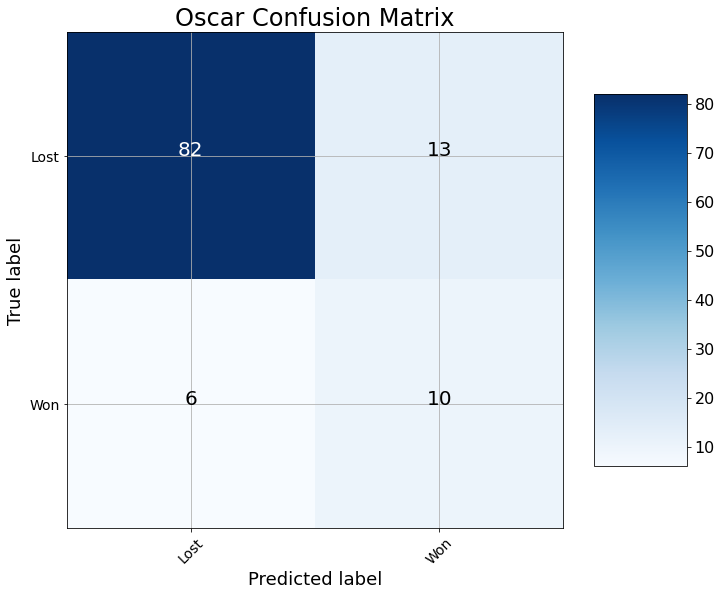

In [181]:
plot_confusion_matrix(cm_dt, classes = ['Lost', 'Won'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

In [182]:
from sklearn import metrics


In [183]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dt))

Accuracy 0.8288288288288288


In [184]:
from sklearn.model_selection import cross_val_score


In [185]:
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 5)
accuracies_dt

array([0.80898876, 0.84269663, 0.80898876, 0.73033708, 0.88636364])

In [186]:
accuracies_dt.mean()

0.8154749744637385

In [187]:
train_probs_dt = classifier_dt.predict_proba(X_train)[:, 1]
probs_dt = classifier_dt.predict_proba(X_test)[:, 1]

train_predictions_dt = classifier_dt.predict(X_train)
predictions_dt = classifier_dt.predict(X_test)

In [188]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


In [189]:
roc_auc_score(y_train, train_probs_dt)
roc_auc_score(y_test, probs_dt)

0.7440789473684211

In [190]:
roc_auc_score(y_test, [1 for _ in range(len(y_test))])

0.5

Recall Baseline: 1.0 Test: 0.62 Train: 1.0
Precision Baseline: 0.14 Test: 0.43 Train: 1.0
Roc Baseline: 0.5 Test: 0.74 Train: 1.0


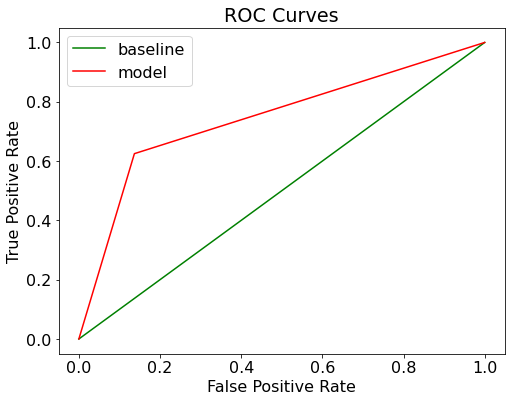

In [191]:
evaluate_model(predictions_dt, probs_dt, train_predictions_dt, train_probs_dt)

In [192]:
test_features = oscar[var_list].values


In [193]:
test_features

array([[2.01700e+03, 7.20000e+00, 1.30017e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 7.50000e+00, 1.06231e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 8.20000e+00, 4.11693e+05, ..., 9.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.02000e+03, 7.50000e+00, 5.63440e+04, ..., 7.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.02000e+03, 7.80000e+00, 1.31684e+05, ..., 3.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.02000e+03, 7.00000e+00, 5.40500e+04, ..., 6.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [194]:
pred_tree = classifier_dt.predict_proba(test_features)[:,1]
movie_name = np.array(oscar['title_pt'])
year = np.array(oscar['year'])
won_oscar = np.array(oscar['win'])

In [195]:
tree_prediction = pd.DataFrame(pred_tree,movie_name,columns =["Probability"] )
tree_prediction["Year"] = year 
tree_prediction["Won"] = won_oscar

In [196]:
tree_prediction.tail(20)

,Probability,Year,Won
Green Book: O Guia,1.0,2018,1
Nasce Uma Estrela,0.0,2018,0
Vice,0.0,2018,0
Ford v. Ferrari,0.0,2019,0
O Irlandes,0.0,2019,0
Jojo Rabbit,0.0,2019,0
Coringa,0.0,2019,0
Adoraveis Mulheres,0.0,2019,0
História de um Casamento,0.0,2019,0
1917,0.0,2019,0


Os 7 de Chicago

# Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
classifier_rf = RandomForestClassifier(n_estimators = 100,random_state = 0,criterion = 'entropy')
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [206]:
importances_forest = list(classifier_rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(var_list, importances_forest)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: votes                Importance: 0.19
Variable: runtime              Importance: 0.16
Variable: year                 Importance: 0.13
Variable: avg_vote             Importance: 0.12
Variable: Won Directors        Importance: 0.12
Variable: metascore            Importance: 0.11
Variable: Oscar Nominations    Importance: 0.05
Variable: Golden Globe Nominations Importance: 0.04
Variable: Bafta Nominations    Importance: 0.04
Variable: Won Golden Globe     Importance: 0.02
Variable: Won Bafta            Importance: 0.01
Variable: Won Actors           Importance: 0.01


In [207]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 4,criterion = 'entropy', random_state = 0)
rf_small.fit(X_train, y_train)

tree_small = rf_small.estimators_[5];

In [208]:
y_pred_rf = classifier_rf.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix

In [210]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization
[[91  4]
 [ 9  7]]


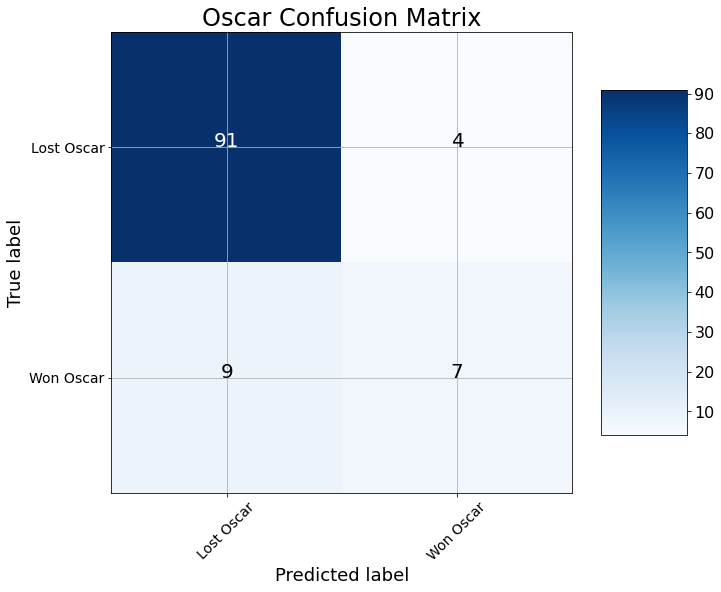

In [211]:
plot_confusion_matrix(cm_rf, classes = ['Lost Oscar', 'Won Oscar'], title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

In [212]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_rf)

0.8828828828828829

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:

accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 8)
accuracies_rf

array([0.82142857, 0.89285714, 0.875     , 0.94642857, 0.89090909,
       0.81818182, 0.83636364, 0.92727273])

In [215]:

accuracies_rf.mean()

0.8760551948051948

In [216]:
train_probs_rf = classifier_rf.predict_proba(X_train)[:, 1]
probs_rf = classifier_rf.predict_proba(X_test)[:, 1]

train_predictions_rf = classifier_rf.predict(X_train)
predictions_rf = classifier_rf.predict(X_test)

In [217]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [218]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_rf)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_rf)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8759868421052631


In [219]:
roc_auc_score(y_test, [1 for _ in range(len(y_test))])

0.5

Recall Baseline: 1.0 Test: 0.44 Train: 1.0
Precision Baseline: 0.14 Test: 0.64 Train: 1.0
Roc Baseline: 0.5 Test: 0.88 Train: 1.0


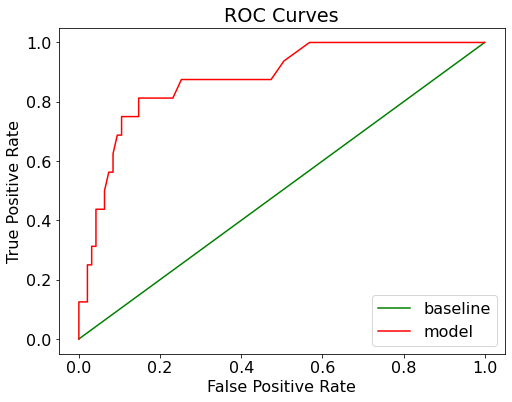

In [220]:

evaluate_model(predictions_rf, probs_rf, train_predictions_rf, train_probs_rf)

In [221]:
oscar[var_list].values

array([[2.01700e+03, 7.20000e+00, 1.30017e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 7.50000e+00, 1.06231e+05, ..., 4.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01700e+03, 8.20000e+00, 4.11693e+05, ..., 9.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.02000e+03, 7.50000e+00, 5.63440e+04, ..., 7.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.02000e+03, 7.80000e+00, 1.31684e+05, ..., 3.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.02000e+03, 7.00000e+00, 5.40500e+04, ..., 6.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [222]:
pred_forest = classifier_rf.predict_proba(oscar[var_list].values)[:,1]
movie_name = np.array(oscar['title'])
year = np.array(oscar['year'])
won_oscar = np.array(oscar['win'])

In [223]:
forest_prediction = pd.DataFrame(pred_forest,movie_name,columns =["Probability"] )
forest_prediction["Year"] = year 
forest_prediction["Won"] = won_oscar

In [224]:

forest_prediction.tail(20)

,Probability,Year,Won
Green Book,0.64,2018,1
A Star Is Born,0.01,2018,0
Vice - L'uomo nell'ombra,0.02,2018,0
Le Mans '66 - La grande sfida,0.03,2019,0
The Irishman,0.10,2019,0
Jojo Rabbit,0.19,2019,0
Joker,0.09,2019,0
Piccole donne,0.01,2019,0
Storia di un matrimonio,0.03,2019,0
1917,0.08,2019,0


????